# Límite y continuidad de funciones escalares y vectoriales

In [19]:
import time
print(' Última ejecución  ', time.asctime() )

 Última ejecución   Wed Feb 22 15:37:16 2023


### Objectivos


Recordar los conceptos de límite y continuidad en funciones de una dimensión.

Y extenderlos a funciones escalares y vectoriales.

Presentar algún ejemplo de cómo estimar los posibles límites de una función escalar.


In [20]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

### Límite de funciones escalares y vectoriales

#### Bola

Antes de estudiar los límites debemos definir un nuevo concepto: **bola**.

En una dimensión, la distancia entre dos valores reales, $x$ y $x_0$, venía dada por el valor absoluto: $|x -  x_0|$.



En un espacio real de n-dimensiones, $\mathrm{R}^n$, $n >1$, la distancia euclídea entre dos puntos, ${\bf x}$ y ${\bf x}_0$ es la norma del vector ${\bf x}- {\bf x}_0$:

$$
|| {\bf x} - {\bf x}_0 || = \sqrt{\sum_{i=1}^{n}(x_i - x_{0i})^2}
$$

Por ejemplo, en dos dimensiones, la distancia entre dos puntos: $(x, y)$ y $(x_0, y_0)$ es : 

$$
\sqrt{(x-x_0)^2 + (y- y_0)^2}
$$

La distancia entre dos puntos es una función escalar.


Si tenemos un espacio real de dimensión $n$, $\mathrm{R}^n$, con $n>1$.  Llamamos **bola** abierta de radio $r$ centrada en un punto ${\bf x}_0$ a todos los puntos de ese espacio, ${\bf x}$, que estén a una distancia de ${\bf x}_0$ menor que $r$. 

$$
\{ \forall {\bf x} \in \mathrm{R}^n \, |  \; ||{\bf x} - {\bf x}_0|| \lt r \}
$$

Si la bola es cerrada la condición es que estén a una distancia menor o igual, $\le$, en la expresión anterior.

Puedes imaginarte que en dos dimensiones, una bola es un disco. Si es cerrada incluye los puntos en la circunferencia de su frontera, si es abierta, no la incluye.

*Cuestión:* ¿qué forma geométrica tiene una bola en tres dimensiones? ¿y en $n$-dimensiones?



Algunas definiciones más:

Decimos que un punto es *interior* a un conjunto $S$, si podemos centrar sobre él una bola cuyos puntos pertenezcan todos al conjunto. Y *frontera*, si todas las bolas que centramos en él, tienen siempre puntos del conjunto y puntos que no lo son.

**Cuestión**: Considera una bola cerrada en un espacio 2D. ¿Los puntos de la circunferencia que limita el disco son interiores o frontera?

**Ejercicio**: ¿Puedes demostrar que todos los puntos de una bola abierta en un espacio 2D son interiores? Fíjate en la celda siguiente.

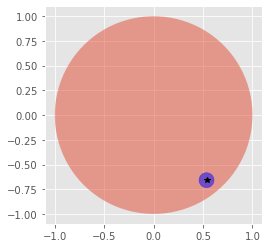

In [21]:
import random
phis     = np.linspace(0., 2*np.pi, 100)
xs, ys   = np.cos(phis), np.sin(phis)
r1, phi  = np.random.uniform(0., 1.), np.random.uniform(0., 2*np.pi)
while (r1 >=1.): r1, phi  = np.random.uniform(0., 1.), np.random.uniform(0., 2*np.pi)
r2       = (1. - r1)/2.
x1, y1   = r1*np.cos(phi), r1*np.sin(phi)
x1s, y1s = x1 + r2 * np.cos(phis), y1 + r2 * np.sin(phis)
fig = plt.figure(); ax = plt.gca()
ax.fill(xs, ys, alpha = 0.5)
ax.plot(x1, y1, '*', color='black')
ax.fill(x1s, y1s, color='blue', alpha = 0.5)
ax.set_aspect('equal');

### Límites

Vamos a revisar la definición de límite de una dimensión.

Para una función $f(x)$ decíamos que existía el límite en un punto $x_{0}$ del dominio o de la frontera de éste, si al aproximarnos a él, la función "se aproximaba a un valor $b$".

Matemáticamente, poníamos una condición. 

Decíamos que $b$ era el límite de $f(x)$ en $x_0$, si siempre podíamos encontrar un intervalo de tamaño $\delta$ alrededor de $x_0$, de tal forma, que el valor de la función en los puntos de ese intervalo, estaba tan próximos al valor $b$ como quisiéramos, dada por una distancia $\epsilon$.


Es más fácil darlo en notación matemática:

Existe el límite de una función $f(x)$ en $x_0$ y vale $b$, si:

$$
\forall \epsilon >0, \; \exists \, \delta >0, \; \mathrm{t.q.} \;| x- x_0| < \delta \, \Rightarrow \, | f(x) - b| < \epsilon
$$



La siguiente gráfica corresponde a la función:

$$
f(x) = \frac{\sin x}{x}
$$

Vemos la función tiene límite en el origen, $x=0$. 

Puedes calcularlo si aplicas la regla de l'Hôpital o haces el desarrollo de Taylor del numerador y denominador en torno a $x=0$


    
    

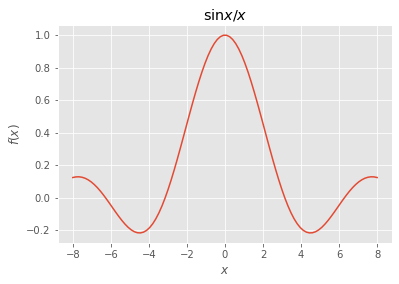

In [22]:
xs = np.linspace(-8., 8., 100)
ys = np.sin(xs) / xs
plt.plot(xs, ys);
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); plt.title('$\sin x /x$');

Decimos que una función escalar $f({\bf x}$) tiene límite en un punto, ${\bf x}_0$, de su dominio o frontera del mismo y vale $b$, si:

$$
\forall \epsilon >0, \; \exists \, \delta >0, \; \mathrm{t.q.} \; \| {\bf x}- {\bf x}_0 \| < \delta \, \Rightarrow \, | f({\bf x}) - b | < \epsilon
$$

El valor de la función, $f({\bf x})$, en los puntos, ${\bf x}$ de una bola de tamaño $\delta$ y centrada en ${\bf x}_0$ están dentro de un intervalo de tamaño $\epsilon$ centrado en $b$.

Y de forma similar para una función vectorial.

Decimos que una función vectorial ${\bf f}({\bf x}$) tiene límite en un punto, ${\bf x}_0$, de su dominio o frontera del mismo y vale ${\bf b}$, si:

$$
\forall \epsilon >0, \; \exists \, \delta >0, \; \mathrm{t.q.} \; \| {\bf x}- {\bf x}_0 \| < \delta \, \Rightarrow \, \| {\bf f}({\bf x}) - {\bf b} \| < \epsilon
$$

El valor de la función, ${\bf f}({\bf x})$, en los puntos, ${\bf x}$ de una bola de tamaño $\delta$ y centrada en ${\bf x}_0$ están dentro de una bola de radio $\epsilon$ centrada en ${\bf b}$.


Observa ahora la gráfica de la función escalar:

$$
f(x, y) = \frac{\sin \sqrt{x^2 + y^2}}{ \sqrt{x^2 + y^2}}
$$

Ves que nuevamente tiene límite en el origen y que vale 1. 

Calcularlo no obstante es más complicado. Hay que recurrir a la definición de límite.

Dado un tamaño $\epsilon$ hay que encontrar un disco de radio $\delta$ centrado en el origen, de tal forma que para los puntos del disco, el valor de la función esté a una distancia menor de $\epsilon$ del límite, de 1 en este caso.

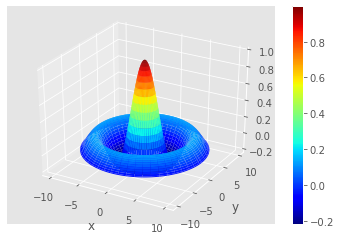

In [23]:
rs       = np.linspace(1e-10, 10., 100)
ps       = np.linspace(0. , 2.*np.pi, 100)
rms, pms = np.meshgrid(rs, ps)
xms      = rms * np.cos(pms)
yms      = rms * np.sin(pms)
zms      = np.sin(rms)/rms
fig = plt.figure(); ax = plt.axes(projection='3d');
sf = ax.plot_surface(xms, yms, zms, cmap='jet', alpha = 1.);
ax.set_xlabel('x'); ax.set_ylabel('y'); fig.colorbar(sf);

La siguiente celda te permite variar el valor de $\epsilon$ y te muestra la gráfica con los puntos que están cerca del límite a una distancia menor que $\epsilon$. 

Su proyección en el plano $(x, y)$ te muestra la bola, el disco, de radio $\delta$, respecto al origen en los que están incluidos todos los puntos. Da igual que valor de $\epsilon$ eligas, siempre encuentras un disco de radio $\delta$. Luego existe el límite y vale 1.

**Explora**: Cambia el valor de $\epsilon$ y observa cómo cambia el disco de tamaño $\delta$ que cumple la condición de límite.

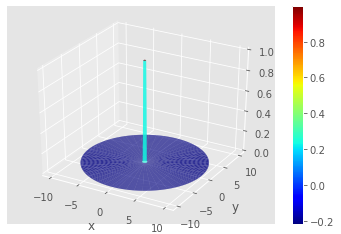

In [24]:
cms = np.sin(rms)/ rms
b, epsilon = 1, 0.01
sel        = abs(zms-b) < epsilon
cms[~sel]  = 0.
fig = plt.figure(); ax = plt.axes(projection='3d')
#ax.plot_surface(xms, yms, zms, cmap = 'jet', alpha = 0.2);
ax.plot_surface(xms, yms, cms, cmap = 'jet', alpha = 0.8);
ax.set_xlabel('x'); ax.set_ylabel('y'); fig.colorbar(sf);

Para calcular los límites utilizaremos una aproximación. 

Calcularemos los límites en un punto aproximándones a él por todas las rectas posibles.

Si el valor del límite que encontremos es el mismo y no depende de la recta, podremos afirmar: *"si existe el límite, éste debe ser su valor".*


**Ejemplo**: Calcula el límite en el origen de la función escalar:

$$
f(x, y) = \frac{\sin(x^2 + y^2)}{x^2 + y^2}
$$

En la siguientes celdas se muestra los conjuntos de nivel de la función y una recta que pasa por el origen.

**Explora** cambia la pendiente de la recta y considera qué valor alcaza la función al aproximarse por esa recta al origen

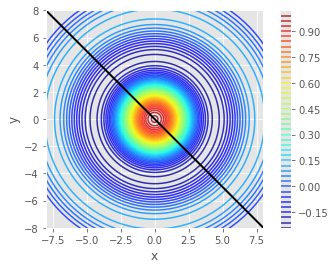

In [25]:
a = -1. #pendiente de la recta que pasa por el origen
xs = np.linspace(-8., 8., 20)
ys = a*xs
fig = plt.figure(); ax = fig.gca()
sf = ax.contour(xms, yms, zms, 40, cmap = 'jet', alpha = 0.8); ax.set_aspect('equal')
ax.plot(xs, ys, color='black', lw=2)
ax.set_xlim(-8., 8.); ax.set_ylim(-8., 8.); fig.colorbar(sf)
ax.set_xlabel('x'); ax.set_ylabel('y');

Calculamos ahora el límite en el origen aproximandonos por todas la rectas que pasan por el origen, que podemos dar en:


- cartesianas:

$$
y = a x + b
$$

donde b = 0, porque pasa por el origen.
Calculamos en 1D el límite cuando $x \rightarrow 0$
    
- o en polares:

$$
x = r \cos \phi; \; y = r \sin \phi
$$
    
donde $\phi \in [0, 2 \pi)$. Tomamos el límite en 1D  cuando $r \rightarrow 0$
    

*Solución*:

En cartesianas, sustituyendo $y = a x$:

$$
\lim_{x \to 0 }\frac{\sin  x \sqrt{(1 +a^2)}}{ x \sqrt{1 + a^2}} = 1
$$

Si existe el límite es 1


ii) o si cambiamos a polares y hacemos el límite $r \to 0$.

$$
\lim_{r \to 0 }\frac{\sin r}{ r} = 1
$$

Si existe el límite es 1.

**Ejercicio**: Calcular si existe el límite en el origen de la función:

$$
f(x, y) = \frac{x y}{x^2 + y^2}
$$


**Observa** primero la gráfica de la función y pregúntate si tiene límite en el origen. Considera por ejemplo aproximarte al origen con rectas dependiente +1 y -1.


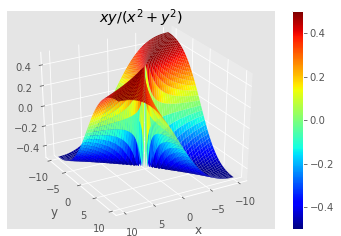

In [26]:
#%matplotlib notebook
xs       = np.linspace(-10., 10., 100)
ys       = np.linspace(-10., 10., 100)
xms, yms = np.meshgrid(xs, ys)
zms      = (xms * yms) /(xms*xms + yms*yms)
fig = plt.figure(); ax = plt.axes(projection='3d');
ax.view_init(azim=60.)
sf  = ax.plot_surface(xms, yms, zms, cmap='jet', alpha = 1.);
plt.xlabel('x'); plt.ylabel('y'); fig.colorbar(sf); plt.title('$xy/(x^2+y^2)$');

Dibujamos ahora los conjuntos de nivel. ¿Son rectas? ¿Qué pasa si te aproximas ahora al origen por cada una de esas rectas?

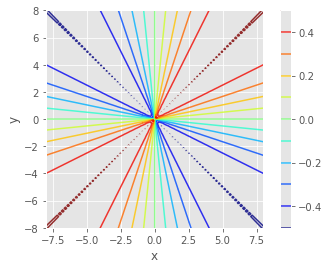

In [27]:
%matplotlib inline
fig = plt.figure(); ax = fig.gca()
cs  = [-0.4999, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.4999]
sf = ax.contour(xms, yms, zms, cs, cmap = 'jet', alpha = 0.8); ax.set_aspect('equal')
ax.set_xlim(-8., 8.); ax.set_ylim(-8., 8.); fig.colorbar(sf)
ax.set_xlabel('x'); ax.set_ylabel('y');


*solución*:

i) si estudiamos el límite a lo largo de la recta $y = ax$ y tomamos el límite $x \to 0$

$$
\lim_{x \to 0} \frac{a x^2 }{x^2 + a^2 x^2} = \frac{a}{1+a^2} 
$$

El límite depende de la pendiente $a$, luego no existe el límite.

Si $a = 0$, el límite valdría 0. 
Si $a = \pm 1$, el limite valdría $\pm 1/2$.




ii) Si cambiamos a polares y luego hacemos el límite $r \to 0$. 

$$
\lim_{r \to 0} \frac{r^2 \cos \phi \sin \phi}{r^2 (\cos^2 \phi +  \sin^2 \phi)} = \cos \phi \sin\phi = \frac{1}{2} \sin 2 \phi
$$

El límite depende del ángulo $\phi$, luego no existe el límite. 

Si $\phi = 0, \pi/2$ la función vale 0, mientras que para $\phi = \pm \pi/4$, vale $\pm 1/2$.



  
**Ejercicio**: ¿Puedes dar las ecuaciones de todas las rectas que pasan por $(x_0, y_0)$? En cartesianas y polares.

*solución*:
    
En cartesianas:

$$
y = y_0 + a (x -x_0)
$$

En polares:

$$
x = x_0 + r \cos \phi, \;\;\; y = y_0 + r \sin \phi
$$


**Teorema**

Sean dos funciones ${\bf f}:S \subset \mathrm{R}^n \to \mathrm{R}^m$ y ${\bf g}:S \subset \mathrm{R}^n \to \mathrm{R}^m$, y $\lambda$ un número real, si existen el $\lim_{{\bf x} \to {\bf a}} {\bf f}({\bf x}) = {\bf b}$ y el $\lim_{{\bf x}\to {\bf a}} {\bf g}({\bf x}) = {\bf c}$ se cumple:

$$ 
i) \;\; \lim_{{\bf x} \to {\bf a}} {\bf f}({\bf x})  + {\bf g}({\bf x})=  {\bf b} + {\bf c}
$$

$$
ii) \;\; \lim_{{\bf x} \to {\bf a}} \lambda {\bf f}({\bf x}) = \lambda {\bf b} 
$$

$$
iii) \; \lim_{{\bf x} \to {\bf a}} {\bf f(x)} \cdot {\bf g}({\bf x}) = {\bf b \; c}
$$

$$
iv) \;\; \lim_{{\bf x} \to {\bf a}} \| {\bf f}({\bf x}) \| = \| {\bf b} \|
$$



**Teorema**

Sea una función vectorial ${\bf f}:S \subset \mathrm{R}^n \to \mathrm{R}^m$, y $f_i({\bf x})$ las m-funciones componentes de ${\bf f(x)}$. El límite 
$\lim_{{\bf x} \to {\bf a}} {\bf f(x)}= {\bf b}$, con ${\bf a} \in S$, existe, si y solo si, existen los límites de sus m-funciones componentes y estos son $\lim_{{\bf x} \to {\bf a}} f_i({\bf x})= b_i$.


*Ejercicio*

Sea la función vectorial:

$$    
{\bf f}( x, y) = \left( \frac{\sin \sqrt{x^2 + y^2}}{(x^2 + y^2)^{1/2}}, \frac{x y}{x^2 + y^2} \right)
$$

¿Tiene límite en el origen?

### Continuidad

En funciones de una dimensión, decíamos que la función era continua en un punto, $x_0$, si pertenecía a su dominio, y el valor de la función en ese punto, $f(x_0)$, coincide con el límite $\lim_{x \to x_0} f(x) = f(x_0)$

Para una función escalar, $f({\bf x})$, diremos que es continua en ${\bf x}_0$, si el punto está en el dominio y el valor de la función y el límite coinciden:

$$
\lim_{{\bf x} \to {\bf x}_0} f({\bf x}) = f({\bf x}_0)
$$

Y para una función vectorial, ${\bf f}({\bf x})$, si, dado un ${\bf x}_0$ del dominio, se cumple:

$$
\lim_{{\bf x} \to {\bf x}_0} {\bf f} (x) = {\bf f}({\bf x}_0)
$$

**Teorema**

Sean dos funciones ${\bf f}:S \subset \mathrm{R}^n \to \mathrm{R^m}$ y ${\bf g}:S \subset \mathrm{R}^n \to \mathrm{R^m}$, y $\lambda$ un número real, si ${\bf f(x), \, g(x)}$ son continuas en un punto ${\bf a}$, se cumple que las siguientes funciones también son continuas en ${\bf a}$:

$$ i) \; {\bf f(x)}  + {\bf g(x)} $$

$$ ii) \; \lambda {\bf f(x)}  $$

$$ iii) \; {\bf f(x)} \cdot {\bf g(x)} $$

$$ iv) \; \| {\bf f(x)} \| $$

**Teorema**

Si la función vectorial es continua en ${\bf a}$, también son lo son las $m$-funciones componentes ${\bf f(x)} = (f_1({\bf x}),\dots,f_m({\bf x}))$ y viceversa.



**¡Esto es todo por ahora!**

### Apéndice

**teorema**

Sea ${\bf g}: A \subset \mathrm{R}^n \to \mathrm{R}^m$ y ${\bf f}:B \subset \mathrm{R}^m \to \mathrm{R}^p$, donde suponemos que el rango de ${\bf g}$ está en el dominio de ${\bf f}$, B. Si ${\bf g(x)}$ es continua en ${\bf a}$ y ${\bf f(y)}$ lo es en ${\bf g(a)}$, entonces la función compuesta ${\bf  f \circ g}: A \subset \mathbf{R}^n \to \mathbf{R}^p$ es continua en ${\bf a}$.


*demostracion:* 

Al ser ${\bf g}, \, {\bf f}$ continuas en ${\bf a}$ y ${\bf g(a)}$, tenemos que $\forall \, \epsilon >0$ y $\epsilon' >0$ existen $\delta >0$ y $\delta'>0$ y se cumple:

$$
\| {\bf x} - {\bf a} \| < \delta \Rightarrow \| {\bf g(x)}-{\bf g(a)} \| < \epsilon' 
$$

$$
\| {\bf y} - {\bf b} \| < \delta' \Rightarrow \| {\bf f(y)}-{\bf f(b)} \| < \epsilon 
$$
 
Al componer ${\bf g}$ sobre ${\bf f}$, aplicamos la función ${\bf f}$ sobre los puntos de llegada de ${\bf g}$. Esto es  ${\bf y} = {\bf g(x)}$ y al ser además ${\bf g}$ continua, $ {\bf b} = {\bf g(a)}$.   

Si tomamos $\epsilon' = \delta '$, tenemos que para todo $\epsilon>0$, existe un $\delta$, tal que, si $\| {\bf x}-{\bf a} \| < \delta$, entonces,

$$
\| {\bf f(g(x))} - {\bf f(g(a))} \| = \, \| {\bf (f \circ g)(x)} - {\bf (f \circ g)(a)} \| < \epsilon.
$$ 

que es la condición de que exista el límite y sea continua la función compuesta.

Q.E.D.

*Cuestión*: ¿Es esta función $h(x,y) = \sin^2 (x^2+y^2)$ continua?